In [1]:
import numpy as np 
import pandas as pd
import os
from tabulate import tabulate

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
style.use('seaborn-v0_8-darkgrid')
plt.rcParams['font.family'] = 'monospace'

from sklearn.model_selection import cross_validate, validation_curve, learning_curve, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = [
    ["Age", "Years old"],
    ["Height", "Height (meter)"],
    ["Weight", "Weight (kilogram)"],
    ["FAVC", "Frequent consumption of high caloric food"],
    ["FCVC", "Frequency of consumption of vegetables (frequency)"],
    ["NCP", "Number of main meals (number)"],
    ["CAEC", "Consumption of food between meals"],
    ["CH20", "Consumption of water daily (liter)"],
    ["CALC", "Consumption of alcohol (frequency)"],
    ["SCC", "Calories consumption monitoring"],
    ["FAF", "Physical activity frequency (day/week)"],
    ["TUE", "Time using technology devices (hour/day)"],
    ["MTRANS", "Transportation used "]
]
headers = ["Abbreviation", "Full Form and Unit of Measurement"]

table = tabulate(data, headers, tablefmt="pipe")
print(table)

| Abbreviation   | Full Form and Unit of Measurement                  |
|:---------------|:---------------------------------------------------|
| Age            | Years old                                          |
| Height         | Height (meter)                                     |
| Weight         | Weight (kilogram)                                  |
| FAVC           | Frequent consumption of high caloric food          |
| FCVC           | Frequency of consumption of vegetables (frequency) |
| NCP            | Number of main meals (number)                      |
| CAEC           | Consumption of food between meals                  |
| CH20           | Consumption of water daily (liter)                 |
| CALC           | Consumption of alcohol (frequency)                 |
| SCC            | Calories consumption monitoring                    |
| FAF            | Physical activity frequency (day/week)             |
| TUE            | Time using technology devices (hour/day)     

| Column Name                     | Description                                                                                                               |
|---------------------------------|---------------------------------------------------------------------------------------------------------------------------|
| Gender                          | person's Gender                                                                  |
| Age                             | Years old (Dtype is float)    |
| Height                          | Height (meter)        |
| Weight                          | Weight (KG)                                                                                  |
| family_history_with_overweight  | yes or no question, to see if person has family history with overweight|
| FAVC                           | <span style="color:skyblue">'Frequent consumption of high calorie food'</span> it is yes or no question to see if person eats high calorie food frequently |
| FCVC                            | <span style="color:skyblue">'Frequency of consumption of vegetables'</span> Similar to FAVC but with vegetables.(1-3 scale)question |
| NCP                             | <span style="color:skyblue">'Number of main meals'</span> NCP is between 1 & 4 (float), it should be binned to 1,2,3 |
| CAEC                            | <span style="color:skyblue">'Consumption of food between meals'</span> takes 4 values Sometimes, Frequently, no & Always |
| SMOKE                           | "Do you smoke?", yes or no question                                                                 |
| CH2O                            | <span style="color:skyblue">'Consumption of water daily'</span> CH2O takes values between 1 & 3 (float), it's values should be 1,2 or 3            |
| SCC                             | <span style="color:skyblue">'Calories consumption monitoring'</span> "Do you monitor your calories consumption?", yes or no question  |
| FAF                             | <span style="color:skyblue">'Physical activity frequency'</span> FAF is between 0 to 3 (float), 0 means no physical activity and 3 means high workout, needs to be encoding to 0,1,2,3 |
| TUE                             | <span style="color:skyblue">'Time using technology devices'</span> TUE is between 0 to 2 (float). I think question will be "How long you have been using technology devices to track your health.", needs to be binned to 0,1,2 |
| CALC                            | <span style="color:skyblue">'Consumption of alcohol'</span> Takes 3 values: Sometimes, no, Frequently            |
| MTRANS                          | <span style="color:skyblue">'Transportation used'</span> MTRANS takes 5 values Public_Transportation, Automobile, Walking, Motorbike, & Bike |
| NObeyesdad                      | <span style="color:skyblue">'TARGET'</span> This is our target value, takes 7 values |

NObesity BMI values are:

- Underweight Less than 18.5
- Normal 18.5 to 24.9
- Overweight 25.0 to 29.9
- Obesity I 30.0 to 34.9
- Obesity II 35.0 to 39.9
- Obesity III Higher than 40

In [3]:
df = pd.read_csv('../data/ObesityDataSet.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [5]:
df.columns = [alias.lower() for alias in df.columns]
df.columns

Index(['gender', 'age', 'height', 'weight', 'family_history_with_overweight',
       'favc', 'fcvc', 'ncp', 'caec', 'smoke', 'ch2o', 'scc', 'faf', 'tue',
       'calc', 'mtrans', 'nobeyesdad'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          2111 non-null   object 
 1   age                             2111 non-null   float64
 2   height                          2111 non-null   float64
 3   weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   favc                            2111 non-null   object 
 6   fcvc                            2111 non-null   float64
 7   ncp                             2111 non-null   float64
 8   caec                            2111 non-null   object 
 9   smoke                           2111 non-null   object 
 10  ch2o                            2111 non-null   float64
 11  scc                             2111 non-null   object 
 12  faf                             21

In [7]:
numerical_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in df.columns if df[cname].dtype == "object"]

# Printing numerical and categorical column lists
print('Numerical Columns: ', numerical_cols)
print('Categorical Columns: ', categorical_cols)

Numerical Columns:  ['age', 'height', 'weight', 'fcvc', 'ncp', 'ch2o', 'faf', 'tue']
Categorical Columns:  ['gender', 'family_history_with_overweight', 'favc', 'caec', 'smoke', 'scc', 'calc', 'mtrans', 'nobeyesdad']


In [8]:
unique_counts = df[categorical_cols].nunique()
unique_values = df[categorical_cols].apply(lambda x: x.unique())

# Create new dataframe with the results
pd.DataFrame({'Number of Unique Values': unique_counts, 'Unique Values': unique_values})

,Number of Unique Values,Unique Values
gender,2,"[Female, Male]"
family_history_with_overweight,2,"[yes, no]"
favc,2,"[no, yes]"
caec,4,"[Sometimes, Frequently, Always, no]"
smoke,2,"[no, yes]"
scc,2,"[no, yes]"
calc,4,"[no, Sometimes, Frequently, Always]"
mtrans,5,"[Public_Transportation, Walking, Automobile, M..."
nobeyesdad,7,"[Normal_Weight, Overweight_Level_I, Overweight..."


In [9]:
nobeyesdadVC = df.nobeyesdad.value_counts()
nobeyesdadVC

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: nobeyesdad, dtype: int64

In [10]:
# Convert the categorical columns to type category
df["gender"] = df.gender.astype("category")
df["family_history_with_overweight"] = df.family_history_with_overweight.astype("category")
df["favc"] = df.favc.astype("category")
df["caec"] = df.caec.astype("category")
df["smoke"] = df.smoke.astype("category")
df["scc"] = df.scc.astype("category")
df["calc"] = df.calc.astype("category")
df["mtrans"] = df.mtrans.astype("category")
df["nobeyesdad"] = df.nobeyesdad.astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   gender                          2111 non-null   category
 1   age                             2111 non-null   float64 
 2   height                          2111 non-null   float64 
 3   weight                          2111 non-null   float64 
 4   family_history_with_overweight  2111 non-null   category
 5   favc                            2111 non-null   category
 6   fcvc                            2111 non-null   float64 
 7   ncp                             2111 non-null   float64 
 8   caec                            2111 non-null   category
 9   smoke                           2111 non-null   category
 10  ch2o                            2111 non-null   float64 
 11  scc                             2111 non-null   category
 12  faf                 

We can easy notice that all non-target attributes are categorical (more specifically nominal).

In [11]:
df.describe()

,age,height,weight,fcvc,ncp,ch2o,faf,tue
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [12]:
# Show the descriptive statistics of categorical features
df[["gender", "family_history_with_overweight", "favc", "caec", "smoke", "scc", "calc", "mtrans", "nobeyesdad"]].describe()

,gender,family_history_with_overweight,favc,caec,smoke,scc,calc,mtrans,nobeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


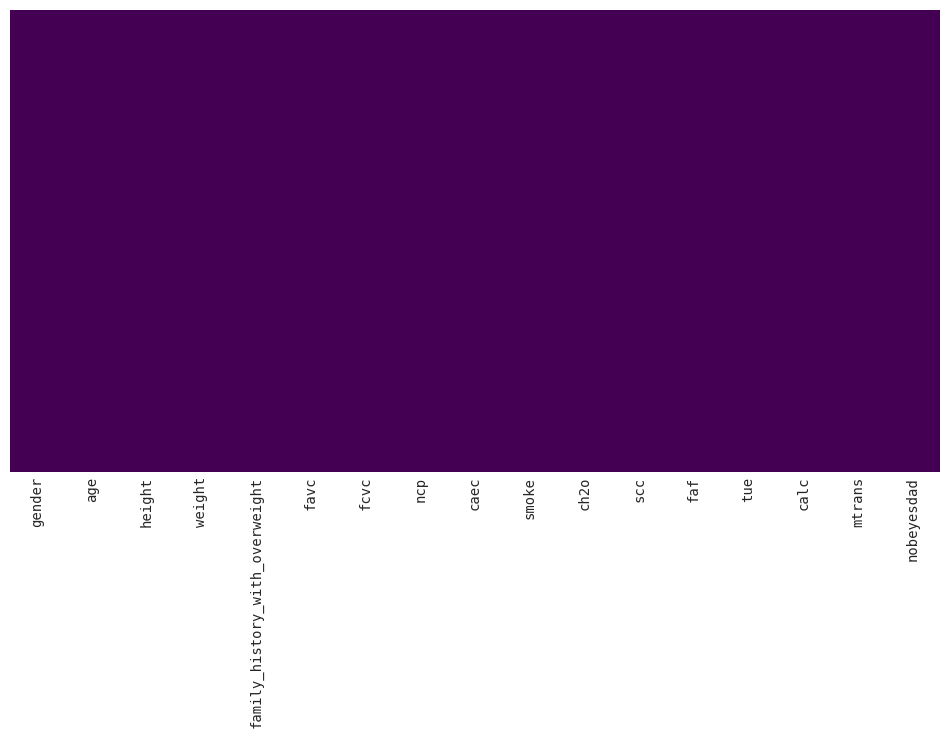

In [13]:
plt.figure(figsize=(12,6))
msno = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

**Note**: The yellow spaces signify missing entries => No missing value

In [14]:
df.duplicated().sum()

24

=> There are some duplicate values in the dataset

In [15]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)

In [16]:
df.duplicated().sum()

0

In [17]:
df.isnull().sum()

gender                            0
age                               0
height                            0
weight                            0
family_history_with_overweight    0
favc                              0
fcvc                              0
ncp                               0
caec                              0
smoke                             0
ch2o                              0
scc                               0
faf                               0
tue                               0
calc                              0
mtrans                            0
nobeyesdad                        0
dtype: int64

=> There are no null values in the dataset

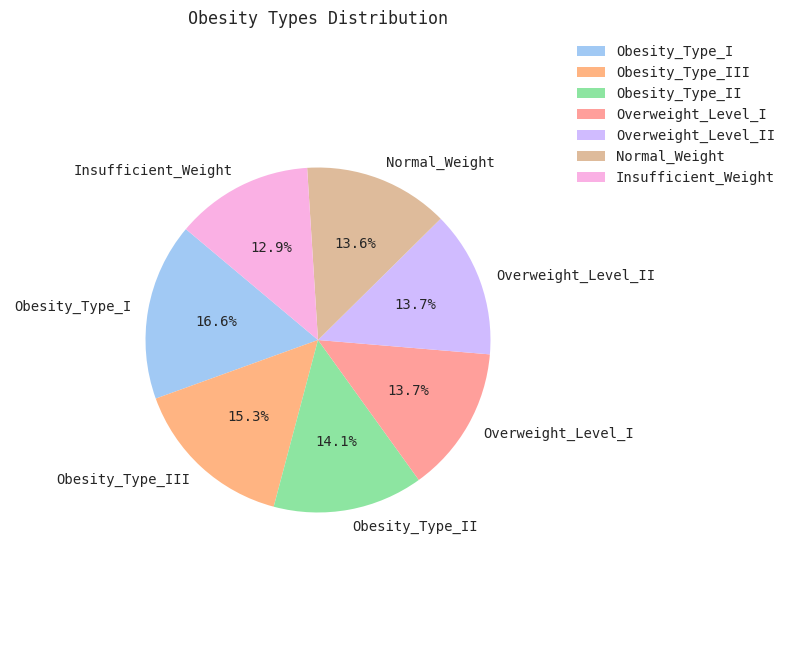

In [18]:
labels = nobeyesdadVC.index.tolist()
sizes = nobeyesdadVC.values.tolist()
colors = sns.color_palette('pastel')[0:10]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors= colors, autopct='%1.1f%%', startangle=140, radius=0.7)
plt.legend(loc='upper left', bbox_to_anchor=(0.9, 1))
plt.title('Obesity Types Distribution')

plt.show()

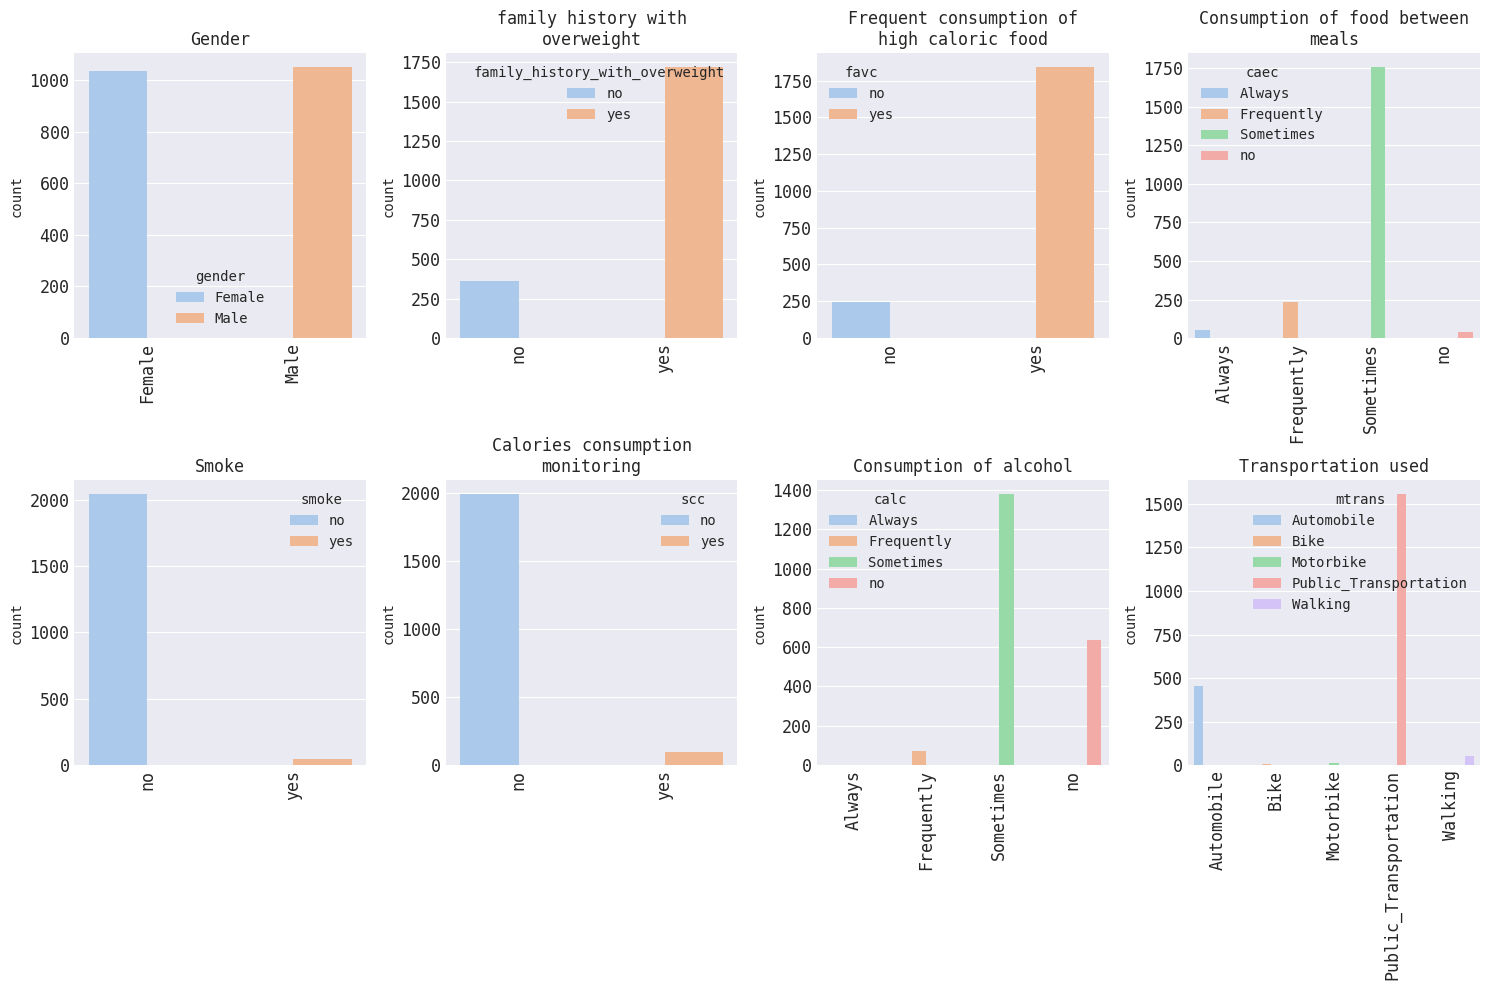

In [19]:
import textwrap
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))

axes = axes.flatten()

num_columns_desc = ['Gender', 'family history with overweight', 'Frequent consumption of high caloric food', 'Consumption of food between meals', 'Smoke', 'Calories consumption monitoring',
                'Consumption of alcohol', 'Transportation used']

for i, column in enumerate(df[categorical_cols].drop(columns=['nobeyesdad']).columns):
    sns.countplot(x=column, data=df, ax=axes[i], hue=column, palette='pastel')
    wrapped_title = '\n'.join(textwrap.wrap(f'{num_columns_desc[i]}', width=27))
    axes[i].set_title(wrapped_title)
    axes[i].title.set_size(12)
    axes[i].tick_params(axis='x', labelrotation=90)  
    axes[i].tick_params(axis='both', which='major', labelsize=12)  
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

- Gender distribution is fairly equal.
- ~82% of people have a family history with Overweight.
- ~92% of people frequently consume high caloric food.
- ~84% of poeple sometimes consumes food between meals while the least says No meals in between.
- ~99% of people are non-smokers.
- ~97% of people do not monitor calories consumption.
- ~72% of people sometimes consumes alcohol.
- ~98% of people use some form of vehicles

In [20]:
num_df = df.drop(["gender", "family_history_with_overweight", "favc", "caec", "smoke", "scc", "calc", "mtrans", "nobeyesdad"], axis=1)
num_df.head()

,age,height,weight,fcvc,ncp,ch2o,faf,tue
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0


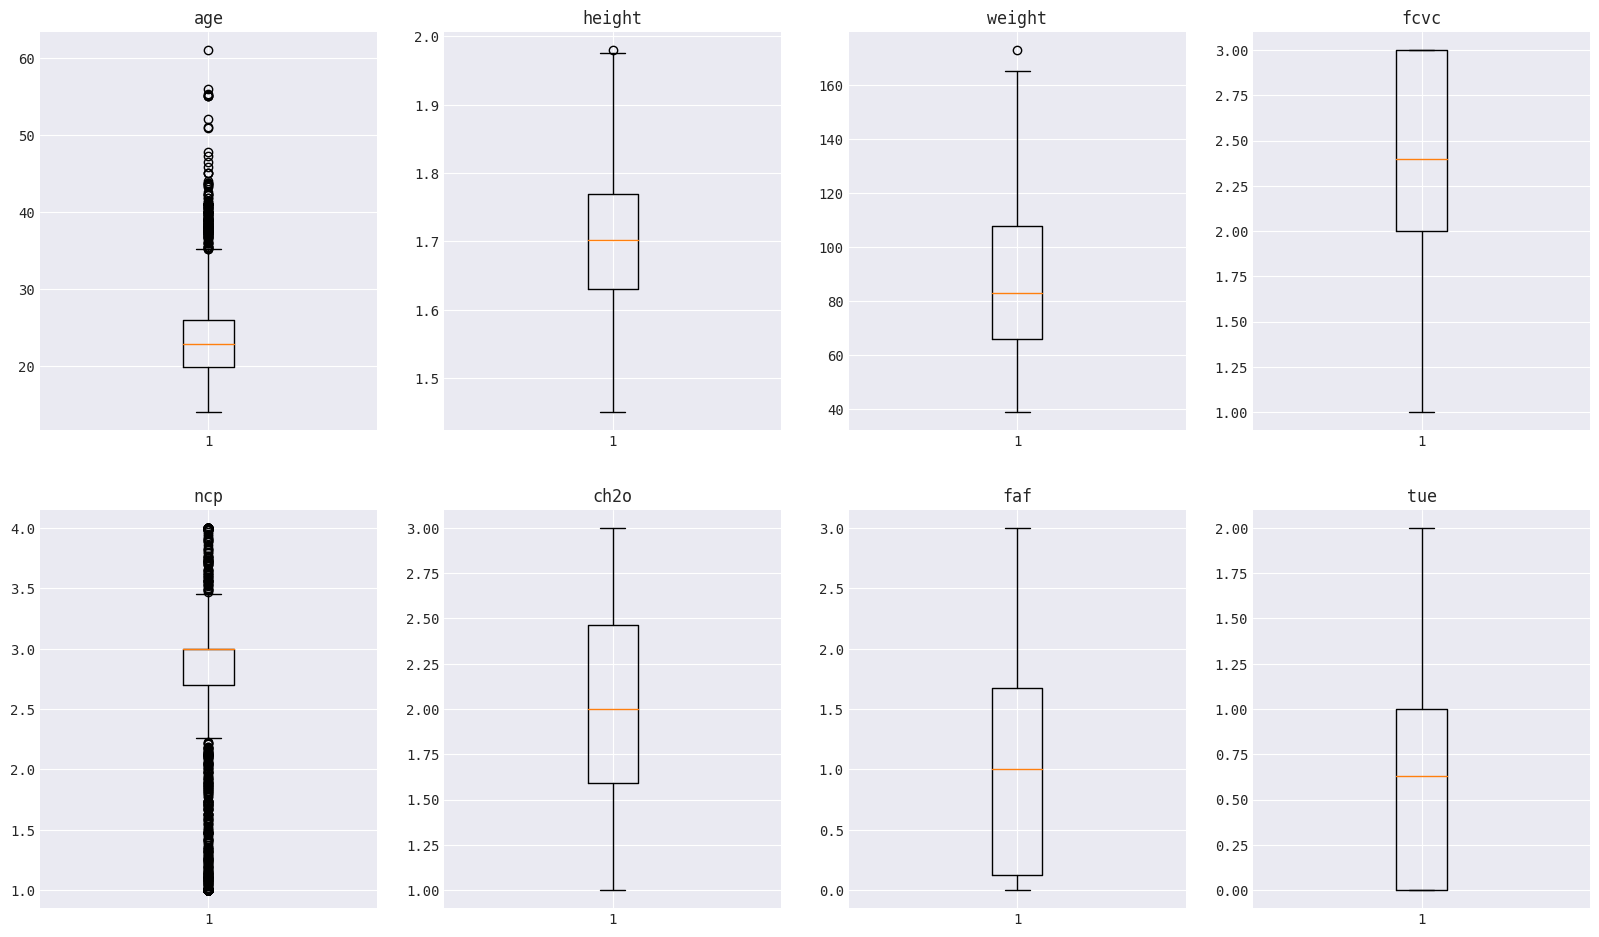

In [21]:
# Visualize the outliers using box plot
plt.figure(figsize=(20,30))
i = 1
columns_desc = ['Age', 'Height', 'Weight', 'Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of water daily',
                'Physical activity frequency', 'Time using technology devices']
for column in num_df.columns:
    plt.subplot(5, 4, i)
    plt.boxplot(df[column], whis=1.5)
    plt.title(f'{column}')
    i += 1

![image](img/iqr.png)

In [22]:
# Calculate number of univariate outliners and its percentage based on IQR mathematical formula
outlier_df = pd.DataFrame(columns=["number", "percentage", "lower_quantile", "upper_quantile"], 
                          index=num_df.columns)

for column in num_df.columns:
    q75, q25 = np.percentile(df[column], [75, 25])
    IQR = q75 - q25
    upper = q75 + (IQR * 1.5)
    lower = q25 - (IQR * 1.5)
    outlier_df.loc[column, "upper_quantile"] = upper
    outlier_df.loc[column, "lower_quantile"] = lower
    outlier_df.loc[column, "number"] = len(np.where((df[column] > upper) | (df[column] < lower))[0])
    outlier_df.loc[column, "percentage"] = len(np.where((df[column] > upper) | (df[column] < lower))[0]) * 100 / len(df)
    
outlier_df.sort_values(by=["number", "percentage"], ascending=False)

,number,percentage,lower_quantile,upper_quantile
ncp,577,27.647341,2.243667,3.453799
age,167,8.001917,10.789844,35.126094
height,1,0.047916,1.421209,1.978461
weight,1,0.047916,2.97614,171.039767
fcvc,0,0.0,0.5,4.5
ch2o,0,0.0,0.278015,3.779099
faf,0,0.0,-2.20589,4.008497
tue,0,0.0,-1.5,2.5


**Suggestion**: This section is just to gain an insight of how irregular the statistics of the data is, which helps to select suitable strategies for ML pipeline later

Age column has around half of the data in the range of 20-30 with lots of outliers at the right end. the distribution is highly skewed towards the right.

Height and Weight are somewhat(not entirely) normally distributed with very few outliers. Weight new features like obses and not obese.

NCP - Number of main meals - Majority of the people have 3 main meals with few people having either 1 or 4.

Consumption of water daily (CH20) - WHO recommends around 3 litres consumption and here in the data we have most of the people consumption around 2-2.5 litres.

Physical activity frequency (FAF) - Most people do little to no excercise as per the distribution on the boxplot.

Time using technology devices (TUE) - Most people spend little to no time as per the distribution on the boxplot.

**Caution**: We assume that the data is consistent (or nearly)

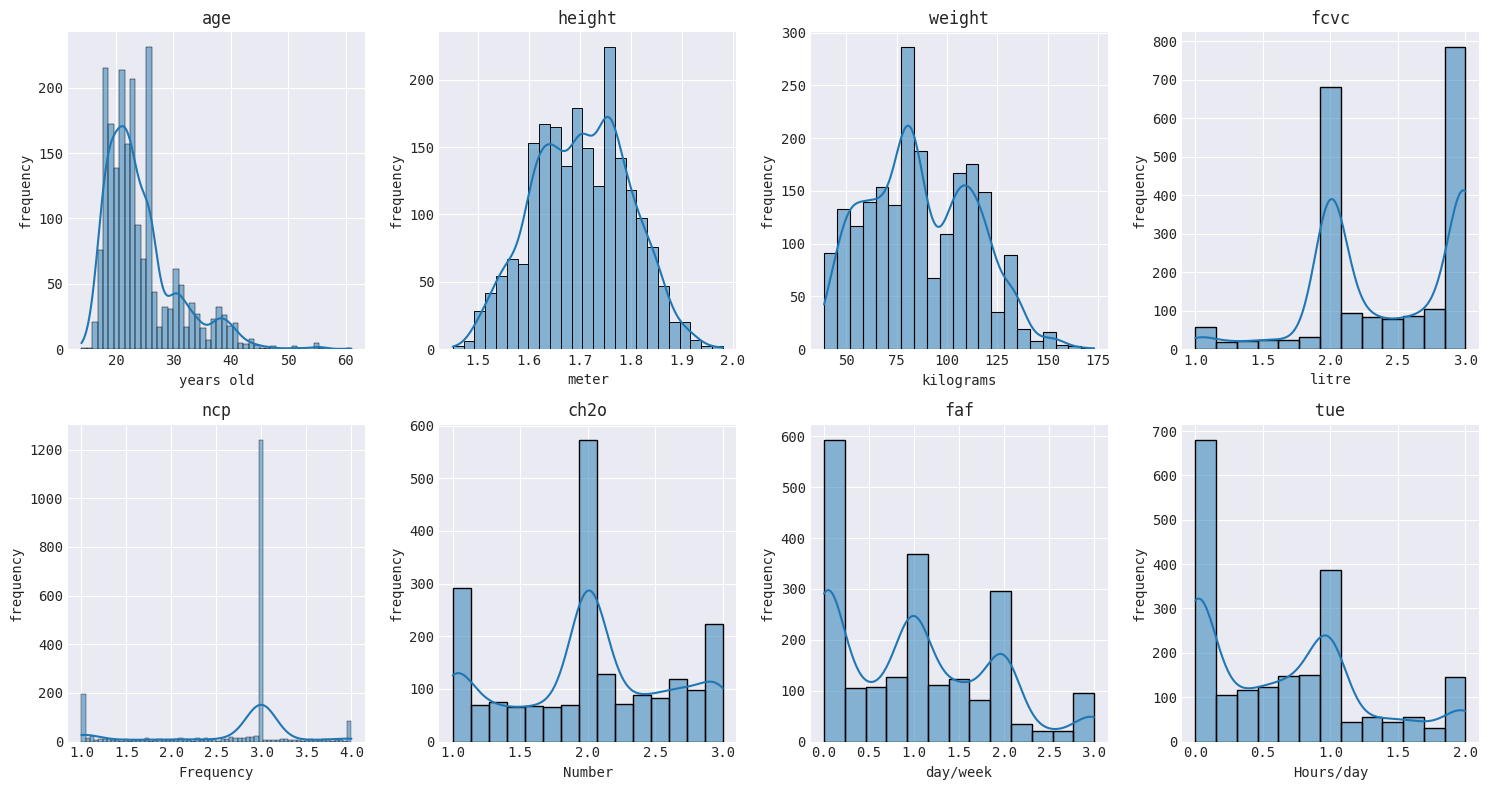

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 4*2))
axes = axes.flatten()

labels = ['years old', 'meter', 'kilograms', 'litre', 'Frequency', 'Number',
                'day/week', 'Hours/day']

for i, column in enumerate(num_df.columns):
    sns.histplot(data=df, x=column, palette='pastel', kde=True, ax=axes[i])
    axes[i].set_title(f'{column}')
    axes[i].title.set_size(12)
    axes[i].set_xlabel(labels[i])
    axes[i].set_ylabel('frequency')
    
plt.tight_layout()
plt.show()

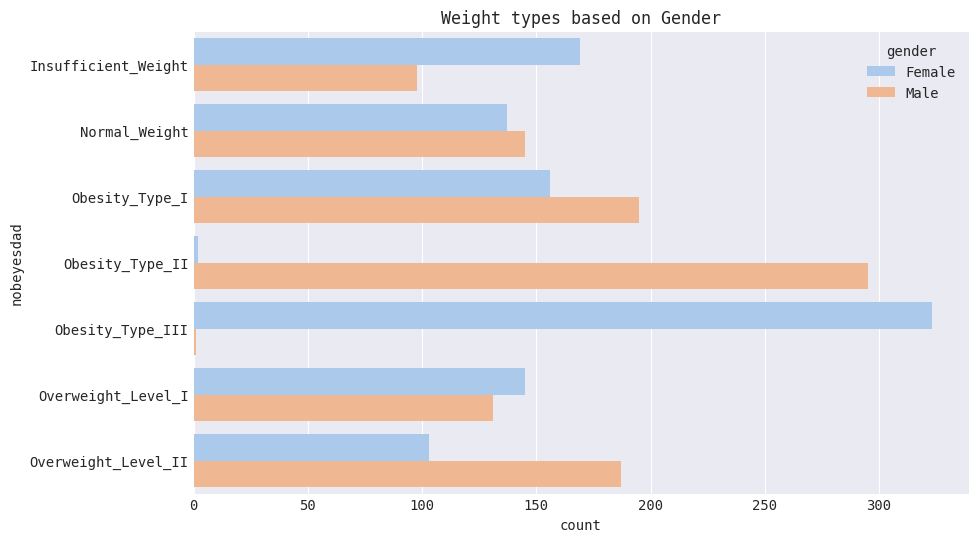

In [24]:
plt.figure(figsize=(10, 6))
plt.title('Weight types based on Gender')
sns.countplot(y='nobeyesdad', palette='pastel', data=df, hue='gender')
plt.show()

- More female with insufficient weight than male.
- Almost all Obesity type 2 repondants are male and all Obesity types 3 are females.
- More than 350 female respondants are fall into the 'Obesity type 3'.

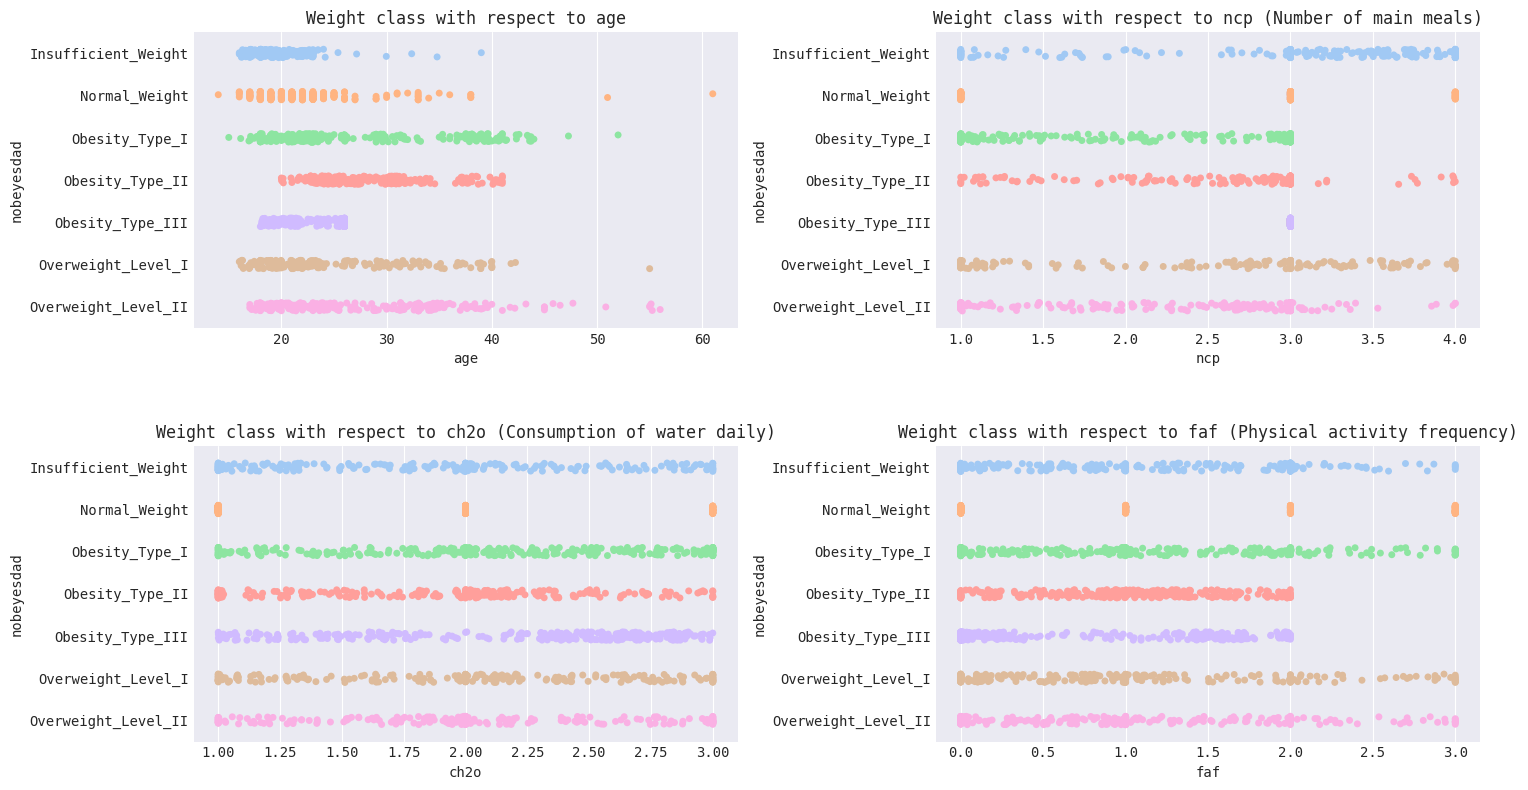

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(15, 4*2))
axes = axes.flatten()
sns.stripplot(data=df, ax=axes[0], x='age', y='nobeyesdad', palette='pastel')
sns.stripplot(data=df, ax=axes[1], x='ncp', y='nobeyesdad', palette='pastel')
sns.stripplot(data=df, ax=axes[2], x='ch2o', y='nobeyesdad', palette='pastel')
sns.stripplot(data=df, ax=axes[3], x='faf', y='nobeyesdad', palette='pastel')

# Title for each subplots
axes[0].set_title('Weight class with respect to age')
axes[1].set_title('Weight class with respect to ncp (Number of main meals)')
axes[2].set_title('Weight class with respect to ch2o (Consumption of water daily)')
axes[3].set_title('Weight class with respect to faf (Physical activity frequency)')

plt.tight_layout()
plt.subplots_adjust(hspace=0.4) 

# Show the plot
plt.show()

- All 'Obesity type 3' repondant's age less than 30.
- All 'Obesity type 3' repondant's age less than 40.
- A significant number of underweight respondants are very young and take more than 3 main meal a day.
- On the other hand, almost all obese type 1 and 2 respondants take less than 3 main meals.
- All obese type 1 and 2 respondants spends less that 2 or 4 days a week doing physical activities.

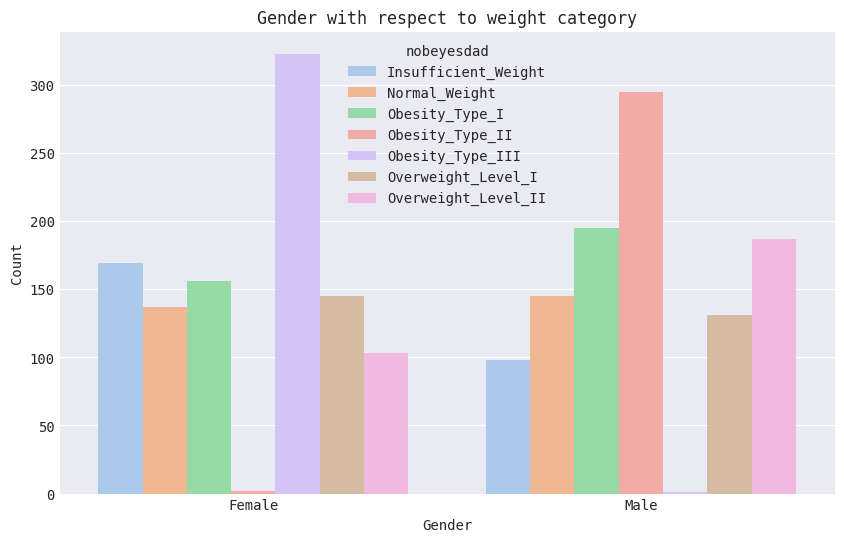

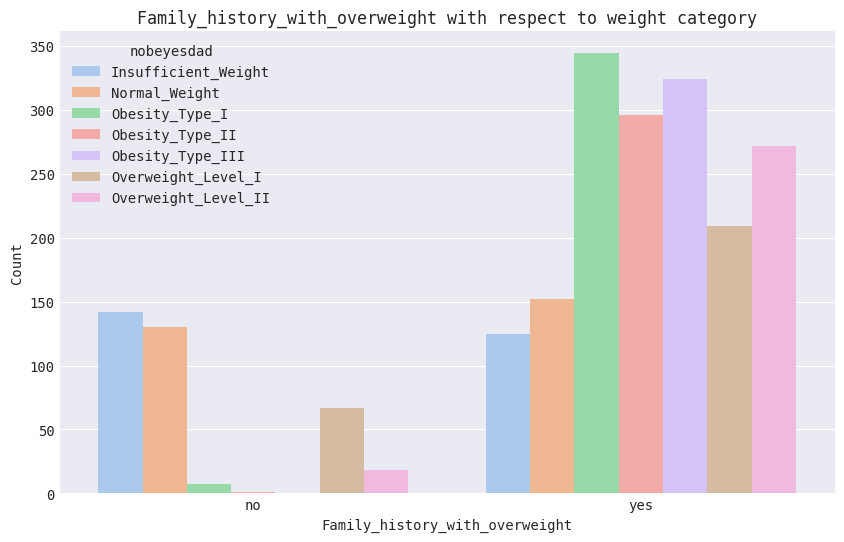

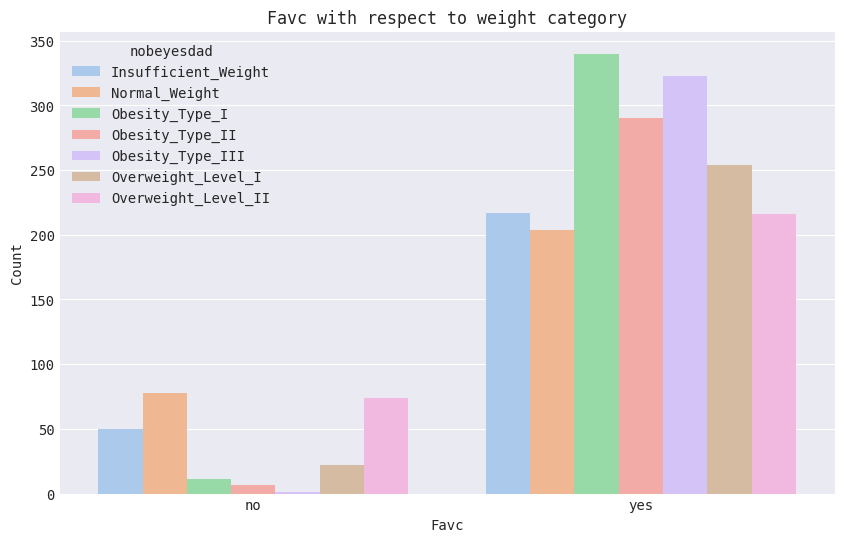

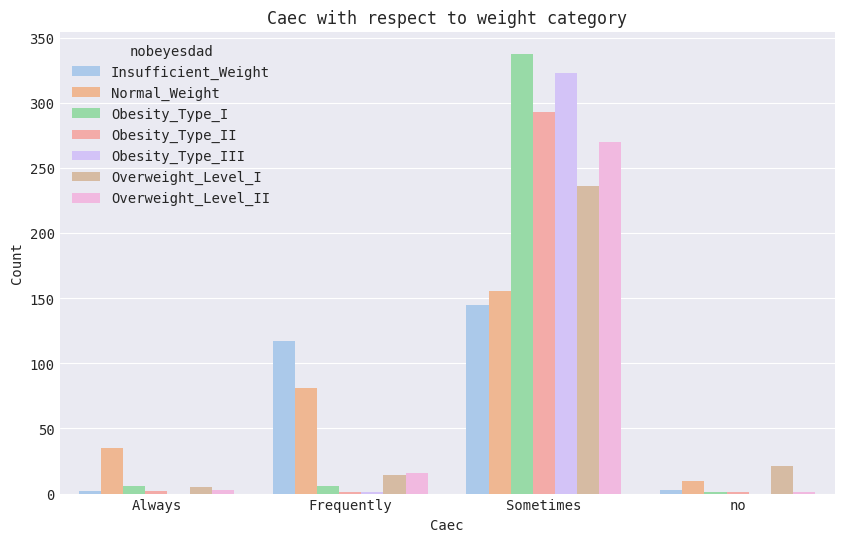

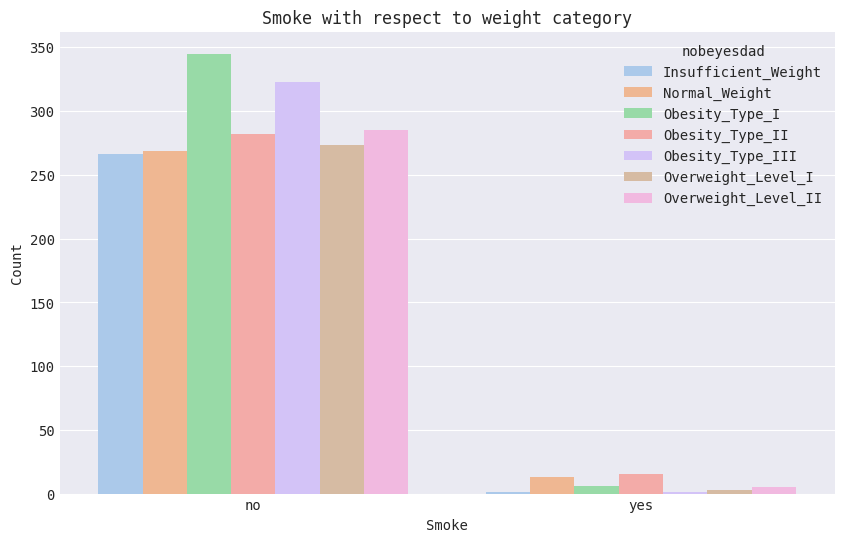

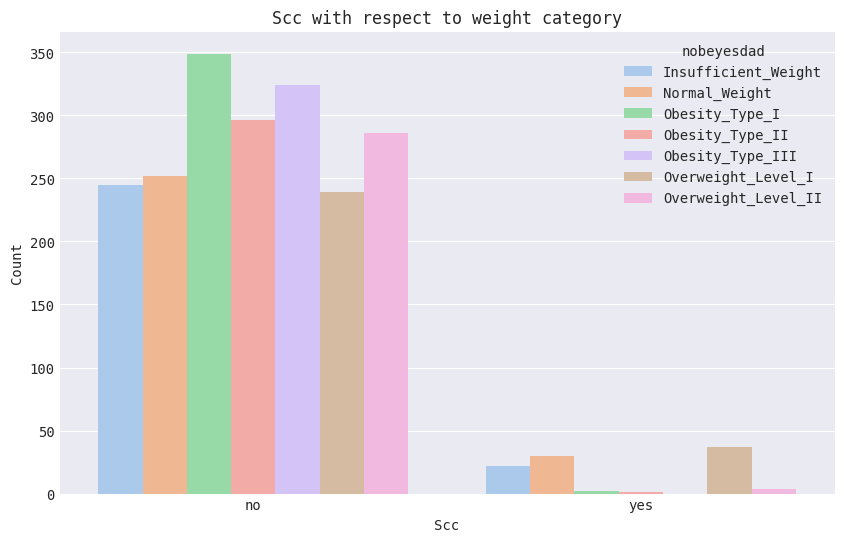

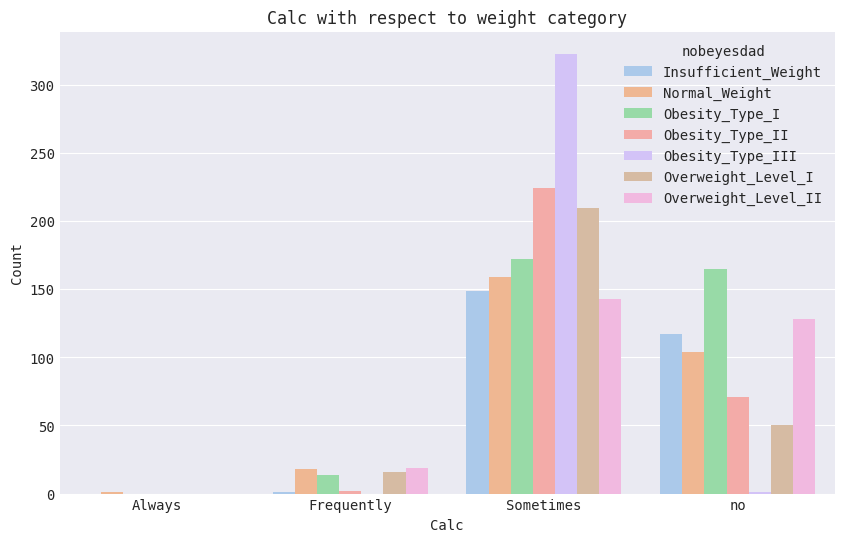

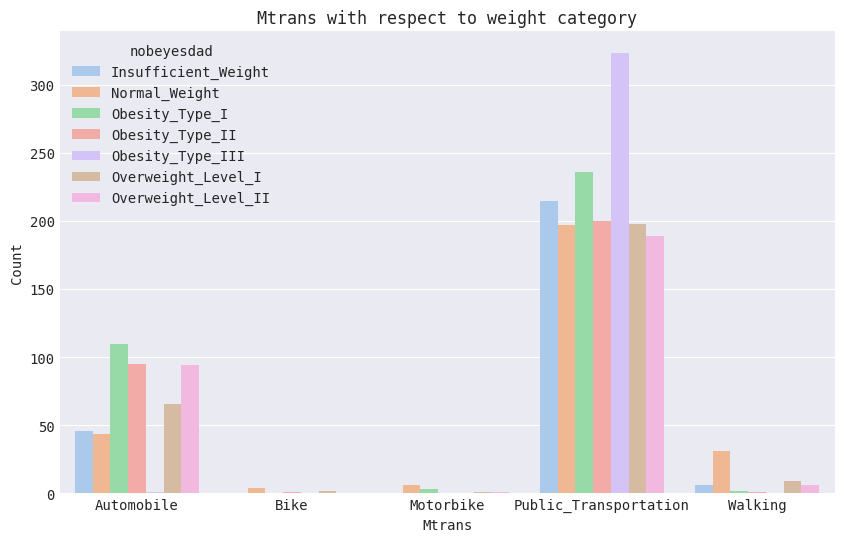

In [53]:
def plot_categorical_with_target(df, cate_col, target_col):
    for col in cate_col:
        if col == 'nobeyesdad':
            continue
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=col, hue=target_col, palette='pastel')
        plt.title(f"{col.capitalize()} with respect to weight category")
        plt.xlabel(col.capitalize())
        plt.ylabel('Count')
        plt.legend(title=target_col)
        plt.show()

# Call the function
plot_categorical_with_target(df, categorical_cols, 'nobeyesdad')

- Most of people suffering from obesity type 3 are females.
- Most of people suffering fromm obesity type 2 are males.
- Most of the people who are susceptible to obesity have a family history with overweight.
- People who consume food that contain much calories are more susceptible to obesity.
- People who track their calories consumption are less susceptible to obesity.
- People who prefer transportations that include physical activity are less susceptible to obesity.

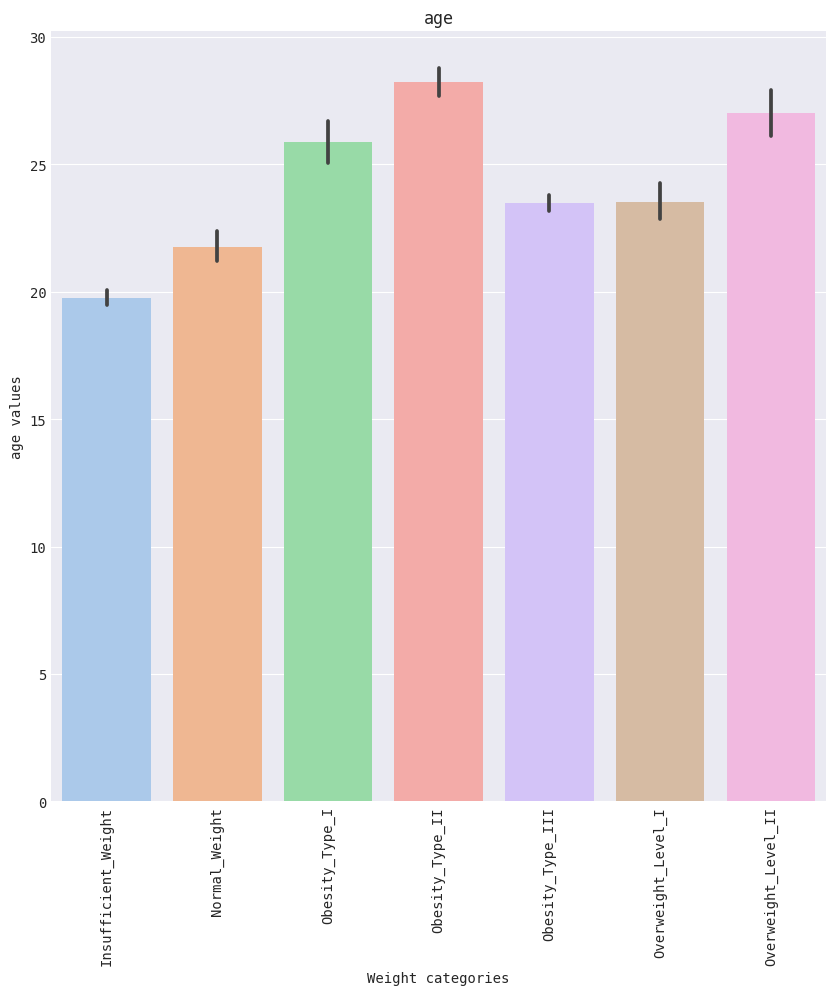

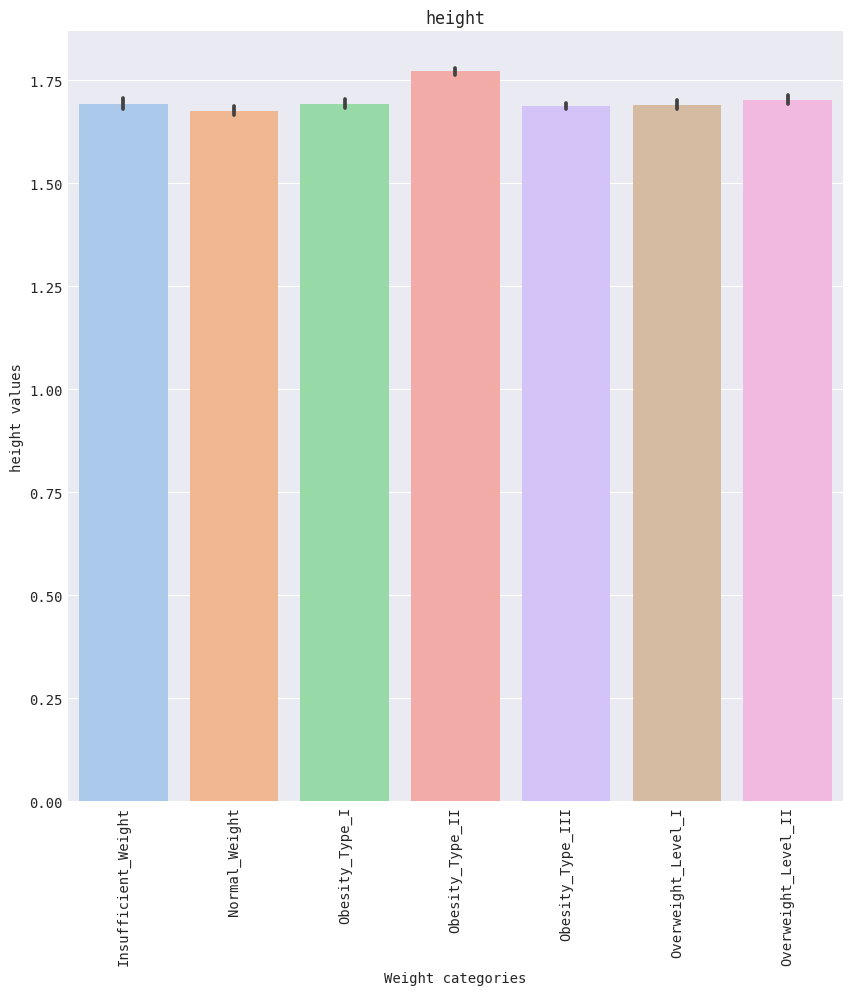

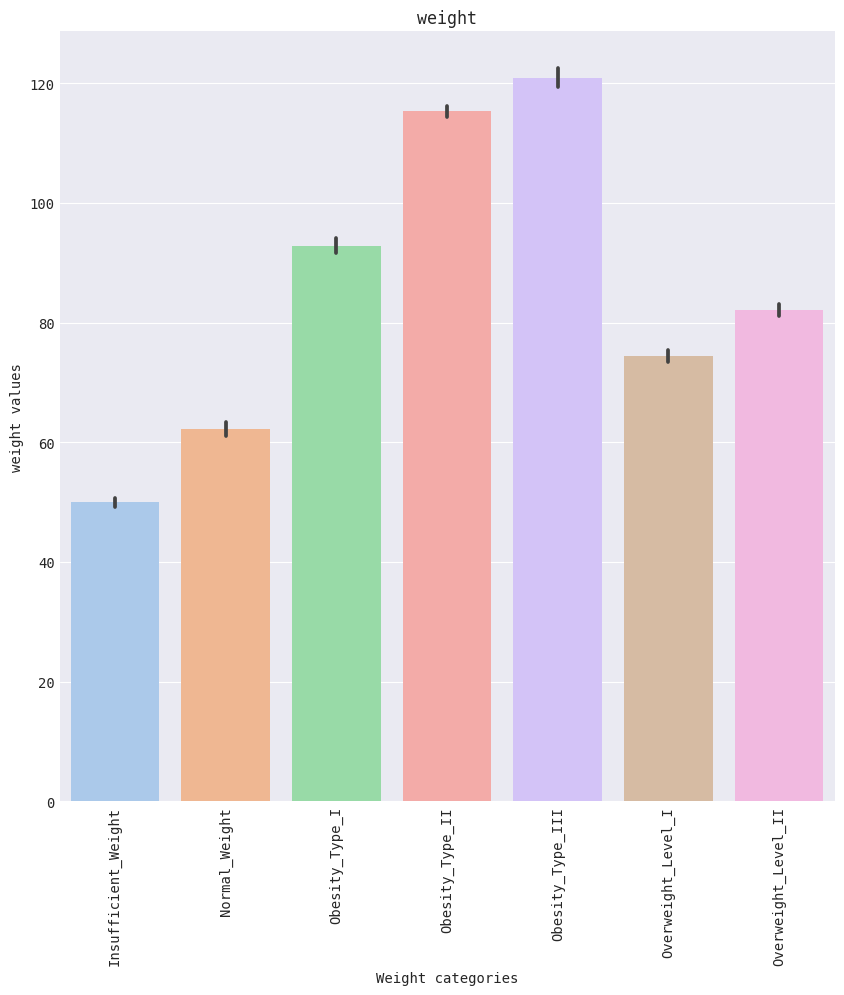

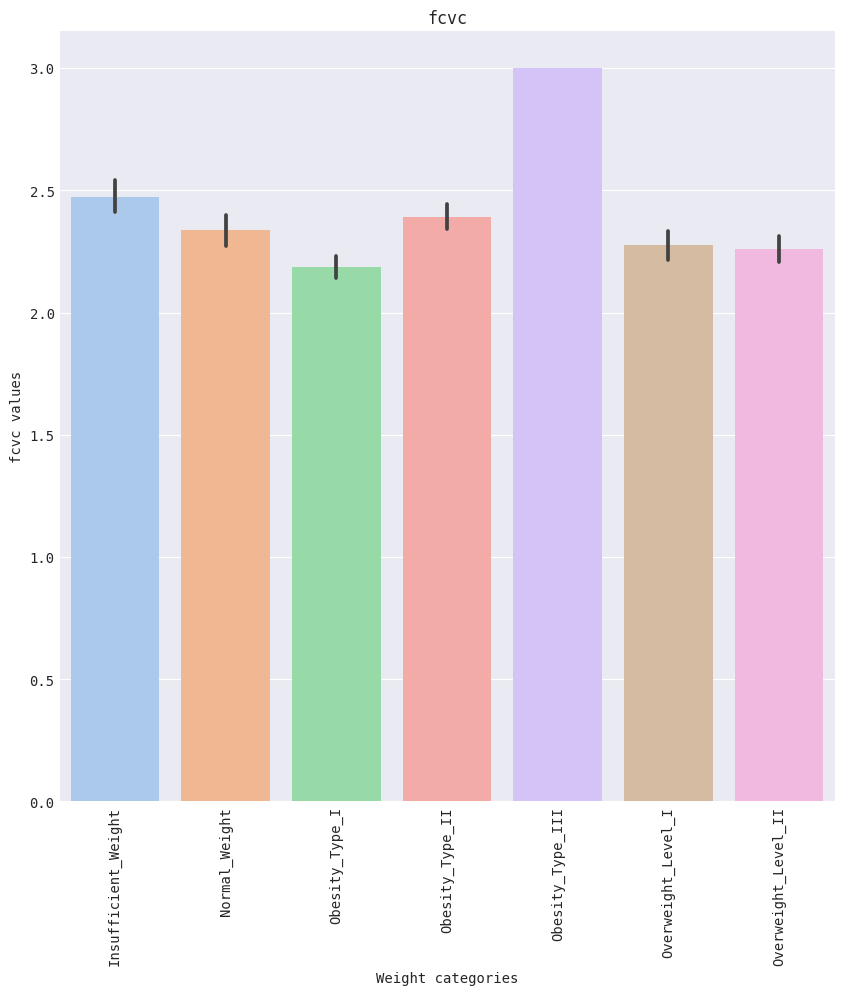

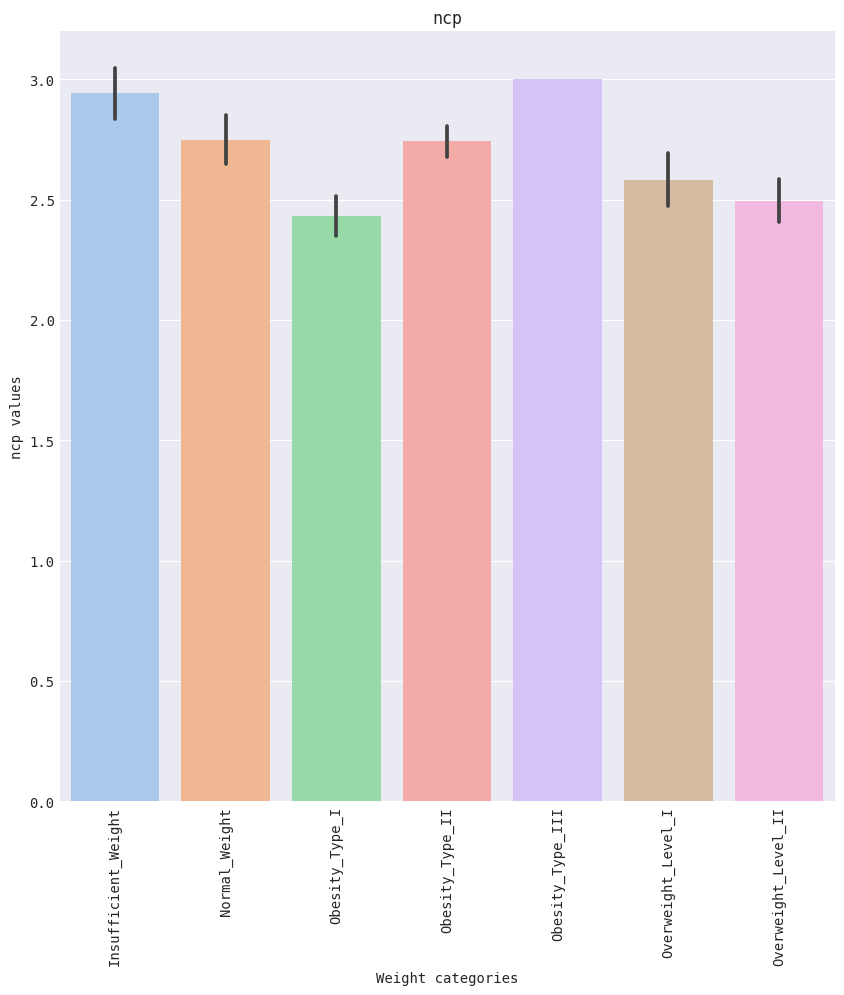

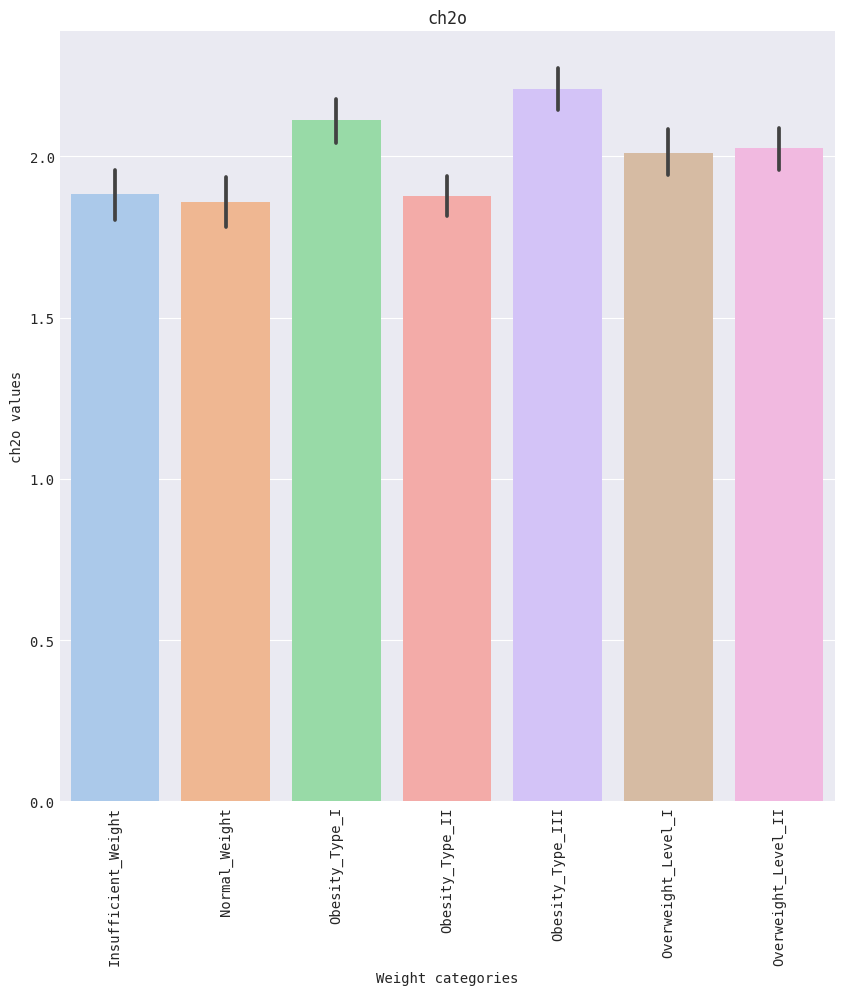

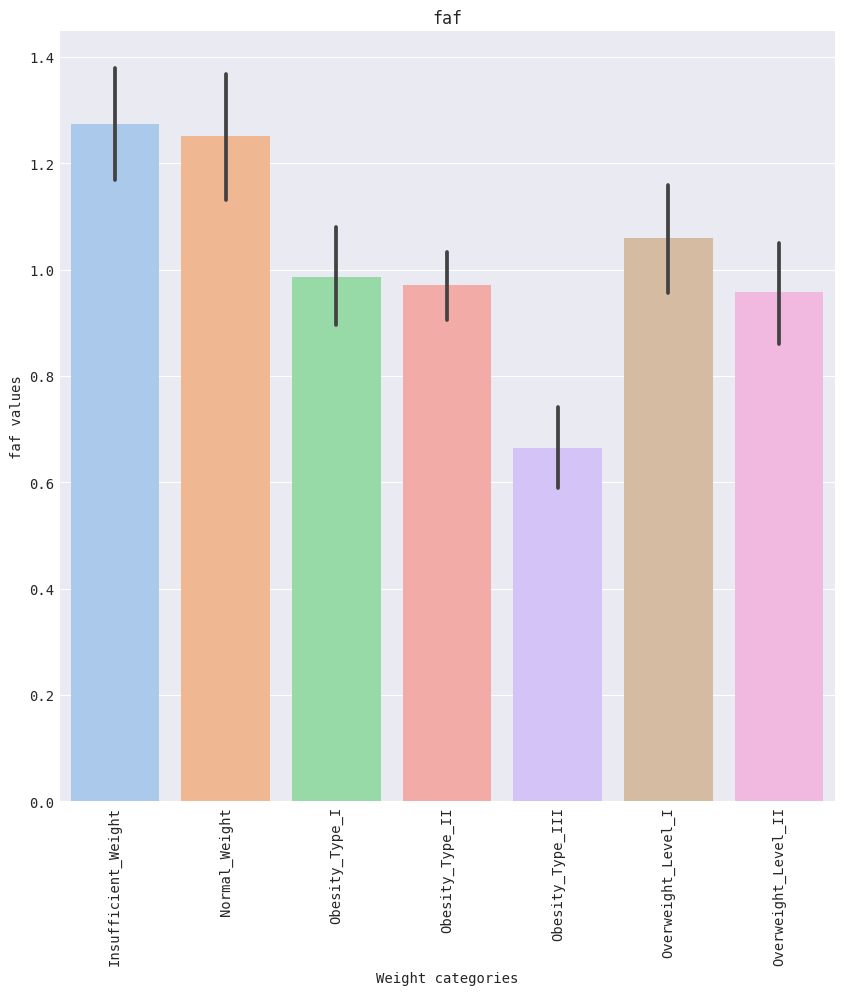

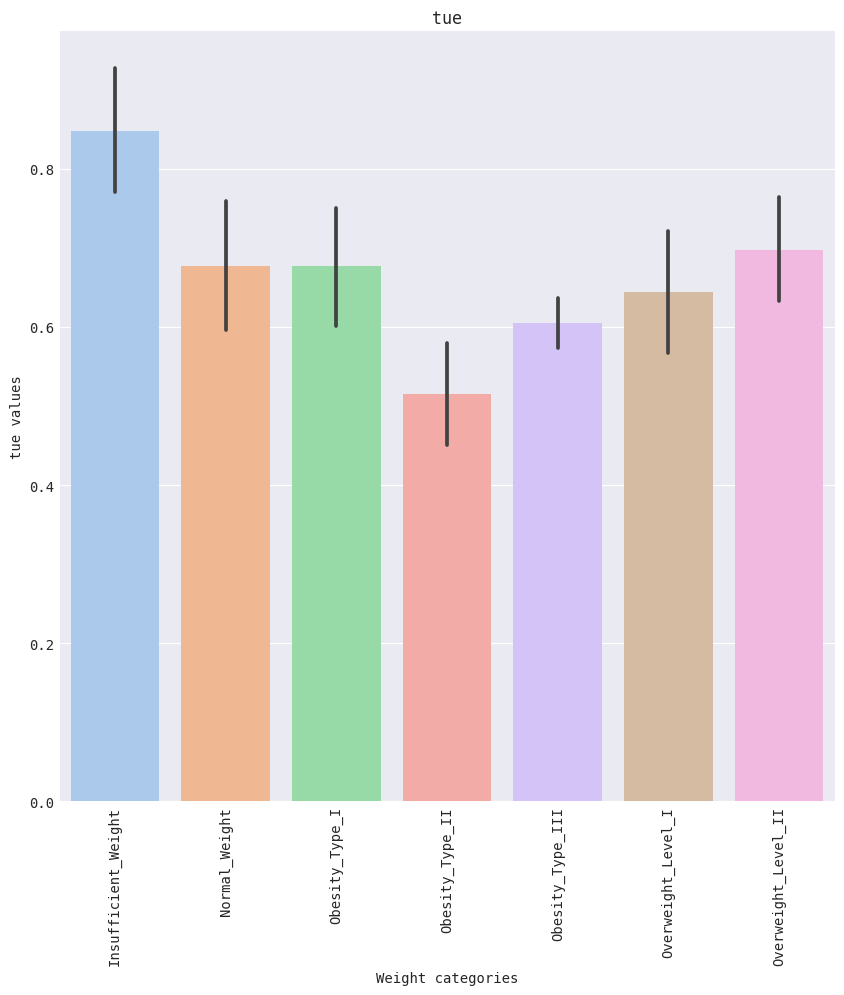

In [57]:
for col in numerical_cols:
    plt.figure(figsize=(10,10))
    sns.barplot(x='nobeyesdad', y=col, data=df, palette='pastel')
    plt.xticks(rotation=90)
    plt.xlabel('Weight categories')
    plt.ylabel(f'{col} values')
    plt.title(f'{col}')
    
plt.show()

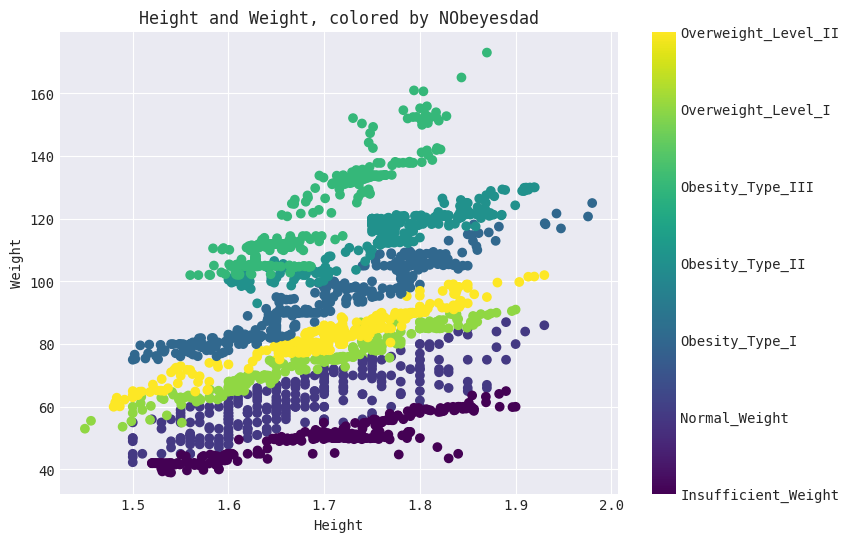

In [76]:
le = LabelEncoder()
df['NObeyesdad_code'] = le.fit_transform(df['nobeyesdad'])

plt.figure(figsize=(9, 6))
plt.scatter(df['height'], df['weight'], c=df['NObeyesdad_code'], cmap='viridis')

plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height and Weight, colored by NObeyesdad')
cbar = plt.colorbar()
cbar.set_ticks(range(len(le.classes_)))
cbar.set_ticklabels(le.classes_)

plt.show()

- There is a positive correlation between height and weight, meaning that higher person tends to be heavier.
- Individuals with obesity types II and III tend to have higher weights compared to those with obesity type I.
- In addition, there seems to be a cluster of individuals with obesity type III who have relatively shorter heights and heavier weights.

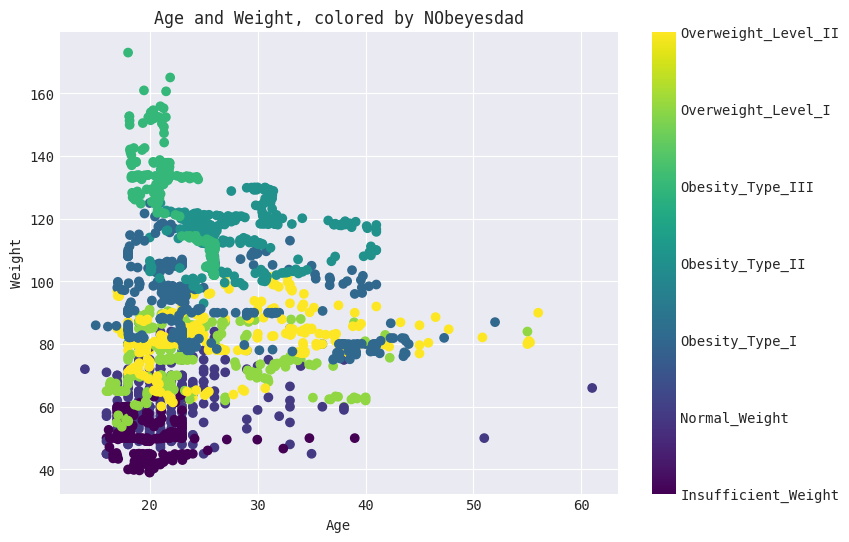

In [77]:
le = LabelEncoder()
df['NObeyesdad_code'] = le.fit_transform(df['nobeyesdad'])

plt.figure(figsize=(9, 6))
plt.scatter(df['age'], df['weight'], c=df['NObeyesdad_code'], cmap='viridis')

plt.xlabel('Age')
plt.ylabel('Weight')
plt.title('Age and Weight, colored by NObeyesdad')
cbar = plt.colorbar()
cbar.set_ticks(range(len(le.classes_)))
cbar.set_ticklabels(le.classes_)

plt.show()

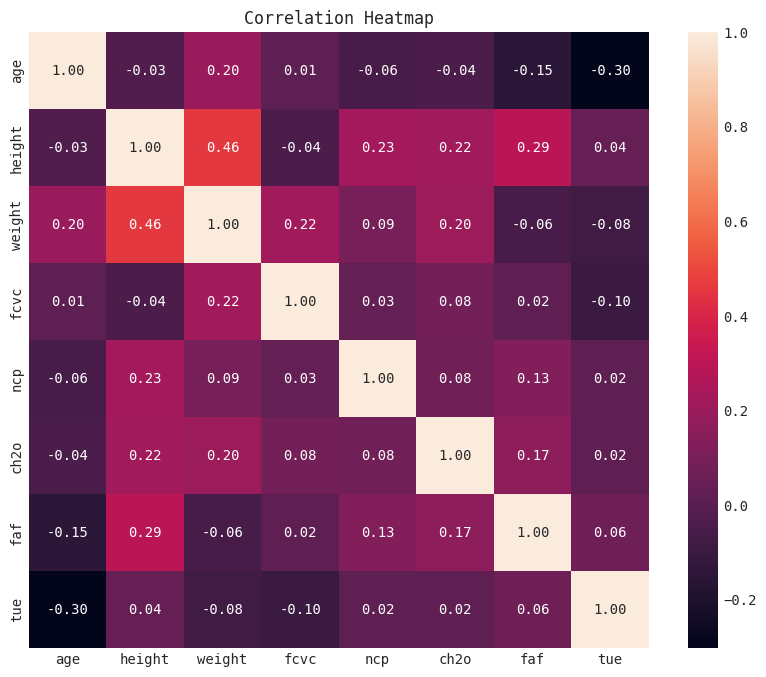

In [28]:
corr = df.corr(method='pearson', numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

- Age and Tech used time are highly negatively correlated.
- Height and weight are positively correlated.